<center><font size = "10"> Week 8 - Synapses <center>
<center><font size = "8">Home work - Solutions<center>

<font size = "3">Please, write your group number and the names and surnames of the group members here
<br>Group number: 3
<br>Group member1: Laura TESTA
<br>Group member2: Alice ALBRECHT
<br>Group member3: Clara LE DRAOULEC
    
__IMPORTANT:__<font size = "3"> Exercises in <font color='red'>red</font> are mandatory assignements to be delivered by next Monday before 23:59.

In [45]:
import neuron
from neuron import h
import numpy as np
import matplotlib.pyplot as plt
import h5py
import seaborn as sns



%matplotlib inline

# Load external files & initialize
neuron.h.load_file("stdrun.hoc")
neuron.h.stdinit()

0.0

## Optional: Plot the dependence of the NMDA conductance on the Mg2+ concentration.

<font sie='3'>Create a single compartmental soma neuron to host the synpase modeled in SimpleAMPA_NMDA.mod file. Using the stimulation pattern and the values for the synaptic conductances used in tutorial 01, plot the NMDA conductance at different mM [Mg2+] values. Select appropiate values to explore the dynamics. 
    
<font sie='3'> What happens to the NMDA conducatance in relation to Mg2+? What is the functional purpose of this behaviour?

# <font color= 'red'>Ex 1:</font>  Configure a facilitating synapse (E1)
    
<font size='3'> Create a single compartmental soma neuron, add to it passive properties, add to the center of the neuron a synapse with the mechanism modeled in TsodyksMarkram_AMPA_NMDA.mod file, inject a stimulation pattern and define the conductances for NMDA and AMPA receptors, as it was done in tutorial 02. 

<font size='3'>Find the values for `U1`, `tau_rec` and `tau_facil` that would make the synapse behave as a facilitating synapse and plot the `R`, `Use` and conductance curves. Write a definition of `U1`, `tau_rec` and `tau_facil`.
    
<font size='3'>Plot comparison (histograms) between the three parameters in three types on synapses (facilitating, depressing and pseudolinear from Tutorial 2) and briefly interpret them. Is there relationship between the parameters and variables depending on the synapse type?
    
 
    
<font size='3'><font color= 'red'>[1.5 pts]</font>

### A neuron to host the synapse

In [24]:
soma = neuron.h.Section()
soma.L = 40
soma.diam = 40
soma.insert("pas")

__nrnsec_0x2b56260

In [25]:
# Configure the passive biophysics
for sec in h.allsec():
    sec.Ra = 100
    sec.cm = 1

In [26]:
synapse = h.TsodyksMarkram_AMPA_NMDA(soma(0.5))

### Define the stimulus:

In [27]:
stimulator = h.VecStim()
spike_times = [100.0, 150.0, 200.0, 250.0, 300.0, 350.0, 400.0, 450.0, 950.0]
spikes_vector = h.Vector(spike_times)
stimulator.play(spikes_vector)

connection = h.NetCon(stimulator, synapse)
connection.weight[
    0
] = 1.0  # In units of [nS] due to the gmax scaling factor in our .mod file

### Create a recorder for the synaptic conductance, current, the soma voltage, and the time intervals

In [28]:
g_syn = h.Vector()
g_syn.record(synapse._ref_g)
i_syn = h.Vector()
i_syn.record(synapse._ref_i)
v_soma = h.Vector()
v_soma.record(soma(0.5)._ref_v)
time = h.Vector()
time.record(neuron.h._ref_t)
R_syn = h.Vector()
R_syn.record(synapse._ref_R)
Use_syn = h.Vector()
Use_syn.record(synapse._ref_Use)

Vector[13]

### AMPA and NMDA conductances

In [29]:
synapse.gmax_AMPA = 0.002  # uS
synapse.gmax_NMDA = (
    0.7 * 0.002
)  # uS - 0.7 is a biologically typical ratio of NMDA to AMPA conductance
synapse.mg = 1.0  # mM

### Facilitating synapse (E1)

In [61]:
synapse.U1 = 0.1 # Baseline release probability
synapse.tau_rec = 200 # ms - recovery from depression
synapse.tau_facil = 700 # ms - relaxation from facilitation

h.tstop = 1000.0 # ms
neuron.h.run()

0.0

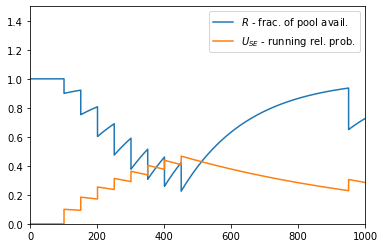

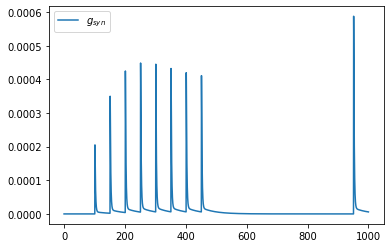

In [62]:
plt.figure()
plt.plot(time, R_syn, label='$R$ - frac. of pool avail.')
plt.plot(time, Use_syn, label='$U_{SE}$ - running rel. prob.')
plt.legend()
plt.axis([0,1000,0,1.5])

plt.figure()
plt.plot(time, g_syn, label="$g_{syn}$")
plt.legend()

U1 represents the baseline release probability, meaning the fraction of ion channels that would open when an AP reaches the presynaptic button, in baseline conditions. 

Tau_rec represent the time constant corresponding to the recovery of the vesicules pool. It represent how long it takes until the synapse is as strong and full of vesciles as before the first AP arrived.

Tau_fac represent the time constant corresponding to the relaxation from facilitation. It represent how long it takes for ion channel to close.

### Comparing the different parameters among the three cell types

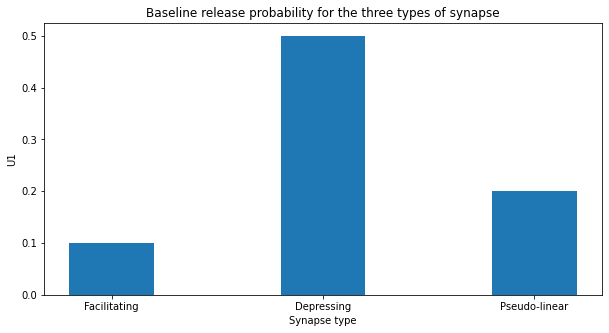

In [55]:
data_U1 = {'Facilitating':0.1, 'Depressing':0.5, 'Pseudo-linear':0.2}
courses = list(data_U1.keys())
values = list(data_U1.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, width = 0.4)
 
plt.xlabel("Synapse type")
plt.ylabel("U1")
plt.title("Baseline release probability for the three types of synapse")
plt.show()

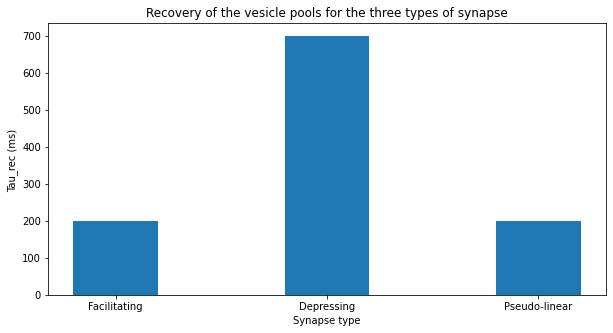

In [57]:
data_tau_rec = {'Facilitating':200, 'Depressing':700,  'Pseudo-linear':200}
courses = list(data_tau_rec.keys())
values = list(data_tau_rec.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, width = 0.4)
 
plt.xlabel("Synapse type")
plt.ylabel("Tau_rec (ms) ")
plt.title("Recovery of the vesicle pools for the three types of synapse")
plt.show()

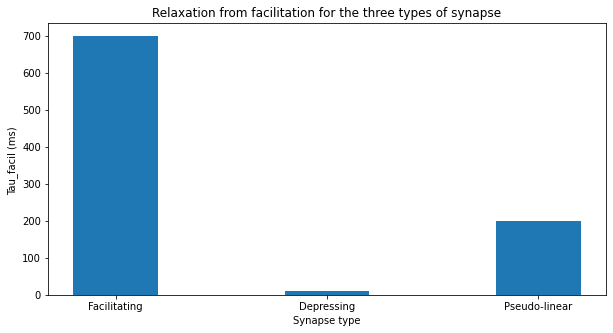

In [58]:
data_tau_facil = {'Facilitating':700, 'Depressing':10,  'Pseudo-linear':200}
courses = list(data_tau_facil.keys())
values = list(data_tau_facil.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, width = 0.4)
 
plt.xlabel("Synapse type")
plt.ylabel("Tau_facil (ms) ")
plt.title("Relaxation from facilitation for the three types of synapse")
plt.show()

#### Relationship among parameters and variables

# <font color= 'red'>Ex 2:</font>  Compute EPSP's Features: amplitudes, latencies, tau rise and Coefficient of Variation (CV) of the EPSP amplitudes 

<font size='3'>Compute the amplitudes, latencies and tau rise of the excitatory postsynaptic potential (EPSP) of the three connections traces provided for your group (.h5 files you can find in the group folder). Visualize the mean values and standard deviations of this features.


<font size='3'>Then compute the coefficient of variation of EPSP amplitudes for each of the connections and the mean CV profile between them. Visualize your results in two plots:
- mean CV profiles: the plot should have four curves, one per each connection and one for the mean
- raster plot of CV of EPSP amplitudes as a function of EPSP amplitudes (all EPSPS, not only the first one)

<font size='3'>Both plots should look similar to the ones in the paper show in the lecture [Barros-Zulaica et al., 2019](https://www.ncbi.nlm.nih.gov/pubmed/31680928). 
    
<font size='3'>*Hint: Be careful with which plot should have a standard deviations*

<font size='3'><font color= 'red'>[2.5 pts]</font>

# <font color='red'>Ex 3:</font> Compute failure rate

<font size='3'>Compute the failure rate of the EPSPs from the connections of your group folder. The failure rate is the fraction of trials from which no PSP is generated above certain threshold. You can find a way of computing the failure rate in [Feldmeyer et al., 1999](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2269646/). Make sure to test for failure based both latency and amplitude size. Necessary noise can be extracted from the initial part of the simulation, before any stimulus arrives. 

    
<font size='3'>Represent the mean result of the three connections in a bar plot. For each connection visualize the distributions of the EPSPs amplitudes with split between the success and failure cases.  

<font size='3'><font color= 'red'>[2 pts]</font>

As defined in the paper of Feldemeyer et al., a failure is an event with amplitude less than 1·5 × noise and/or latency larger than 2·5 × the mean latency. Therefore, the parameters that we have to extract from the traces are:
- EPSP amplitude
- latency
- noise from the initial part of the stimulation before the stimulus

Let's start by extracting the parameters from each connection. We will use the mean EPSPs trace from each of our connetions, as it is asked in the question.


### functions

In [ ]:
# definitions of helpful functions 

# we will use this funciton to extract the noise before the stimulation
def extract_PSP_window(trace, time, stimulation_index, time_before=50, time_after=300):
    """Extract a time window with a single EPSP trace"""
    psp_trace = trace[stimulation_index - time_before : stimulation_index + time_after]
    psp_time = time[stimulation_index - time_before : stimulation_index + time_after]

    return psp_trace, psp_time


# this function is to extract the parameters.
def extract_one_EPSP_features(psp_trace, psp_time, stimulation_time):
    """
    Function takes in a EPSP curve and calculates the following features: amplitude;
    5%, 20% and 80% of the amplitude, tau rise and latency. Based on defintions from
    Feldmeyer et al., 1999.

    Parameters
    ----------
    psp_trace : array with voltage trace [mV]
    psp_time : array of psp times [s]
    stimulation_time : time of the stimulation [s]

    Returns
    -------
    amplitude : amplitude of the  EPSP computed as the difference between the 20 and the 80 % of rise
    latency : time between the AP of the presynaptic cell and 5% amplitude rise of the EPSP [s]
    """

    # find absolute values of the psp trace
    max_psp = np.max(psp_trace)
    min_psp = np.min(psp_trace)
    amplitude_psp = np.abs(max_psp - min_psp)

    # compute percentages of amplitudes
    five_amplitude = amplitude_psp * 95.0 / 100.0
    twenty_amplitude = amplitude_psp * 80.0 / 100.0
    eighty_amplitude = amplitude_psp * 20.0 / 100.0
    amplitude = eighty_amplitude - twenty_amplitude
    # compute amplitude percentages on the psp trace
    psp_percent = {
        "five": -(five_amplitude - max_psp),
    }

    # find corresponding index of an array
    five_index = np.where(psp_trace >= psp_percent["five"])[0][0]
   
    # extract time points for percentage points of the trace
    psp_times = {
        "five": psp_time[five_index],
    }

    # calculate time features of a PSP
    latency = np.abs((psp_times["five"]) - stimulation_time)

    return abs(amplitude)*1000, latency


# extract the features of each EPSP
def extract_all_EPSP_features(stimulation_indices, mean_trace, time):
    amplitudes = np.array([])
    latencies = np.array([])
    
    for index in stimulation_indices:
        stimulation_time = time[index]
        psp_trace, psp_time = extract_PSP_window(mean_trace, time, index)
        amp, lat = extract_one_EPSP_features(psp_trace, psp_time, stimulation_time)
        
        amplitudes = np.append(amplitudes, amp)
        latencies = np.append(latencies, lat)

    return amplitudes, latencies

# used to extract the amplitude of the noise, before any stimulation
def extract_amplitude_noise(psp_trace):
    """Extract amplitude from a single EPSP trace and convert to mV"""
    max_psp = np.max(psp_trace)
    min_psp = np.min(psp_trace)

    return np.abs(max_psp - min_psp) * 1000

# exrac the amplitude of the noise before the stimulation
def extract_noise(trace, time, stimulation_index):
    
    psp_trace, psp_time = extract_PSP_window(trace, time, stimulation_index, time_before=1000, time_after=-1)
    noise = extract_amplitude_noise(psp_trace)
    return noise

# get the traces and their mean from the h5 files and 
def get_traces(data):
    traces = []
    for key in data.keys():
        traces.append(data.get(key))

    traces = np.array(traces)
    mean_trace = np.mean(traces, axis=0)
    return traces, mean_trace

# plot the traces and the mean
def plot_traces(traces, mean_trace, filename):
    plt.figure()
    for trace in traces:
        plt.plot(trace, "b--", )
    plt.plot(mean_trace, "r", label='mean_trace')
    plt.legend()
    plt.title('Traces of connection file:'+str(filename))

### Load traces and mean traces

In [ ]:
# load data
data_1 = h5py.File("connection_c60.h5", "r")
data_2 = h5py.File("connection_c64.h5", "r")
data_3 = h5py.File("connection_c71.h5", "r")

#data_1.keys()

In [ ]:
#traces_1, mean_traces_1 = get_traces(data_1)
traces_2, mean_traces_2 = get_traces(data_2)
traces_3, mean_traces_3 = get_traces(data_3)


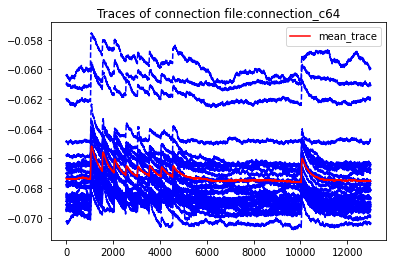

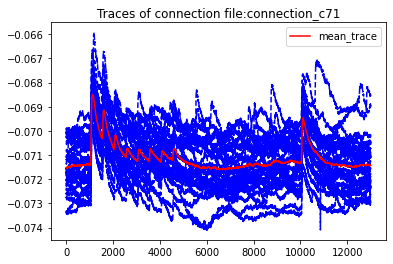

In [ ]:
#plot_traces(traces_1, mean_traces_1, 'connection_c60')
plot_traces(traces_2, mean_traces_2, 'connection_c64')
plot_traces(traces_3, mean_traces_3,  'connection_c71')


### Define time and stimulation times

In [ ]:
time = np.arange(0, 1.3, 0.0001)
stimulation_indices = np.array([1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 10000])

### Extract amplitude, noise and latency from each connections

In [ ]:
#amplitudes_1, latencies_1 = extract_all_EPSP_features(stimulation_indices, mean_trace_1, time)
#mean_latency_1 = np.mean(latencies_1)
#noise_1 = extract_noise(mean_traces_1, time, stimulation_indices[0])
amplitudes_2, latencies_2 = extract_all_EPSP_features(stimulation_indices, mean_traces_2, time)
mean_latency_2 = np.mean(latencies_2)
noise_2 = extract_noise(mean_traces_2, time, stimulation_indices[0])
amplitudes_3, latencies_3 = extract_all_EPSP_features(stimulation_indices, mean_traces_3, time)
mean_latency_3 = np.mean(latencies_3)
noise_3 = extract_noise(mean_traces_3, time, stimulation_indices[0])


### Detect failures

In [ ]:
# connection 1
num_EPSP_1 = amplitudes_1.shape[0]
failures_1 = np.zeros(9)
for epsp in range(0,num_EPSP_1):
    
        # amplitude condition
        if amplitudes_1[epsp]<1.5*noise_1:
            failures_1[epsp]=1
            
        # latency condition
        if latencies_1[epsp]>2.5*mean_latency_1:
            failures_1[epsp]=1
            

NameError: name 'amplitudes_1' is not defined

In [ ]:
# connection 2
num_EPSP_2 = amplitudes_2.shape[0]
failures_2 = np.zeros(9)
for epsp in range(0,num_EPSP_2):
    
        # amplitude condition
        if amplitudes_2[epsp]<1.5*noise_2:
            failures[epsp]=1
            
        # latency condition
        if latencies_2[epsp]>2.5*mean_latency_2:
            failures[epsp]=1
            

In [ ]:
# connection 3
num_EPSP_3 = amplitudes_3.shape[0]
failures_3 = np.zeros(9)
for epsp in range(0,num_EPSP_3):
    
        # amplitude condition
        if amplitudes_3[epsp]<1.5*noise_3:
            failures_3[epsp]=1
            
        # latency condition
        if latencies_3[epsp]>2.5*mean_latency_3:
            failures_3[epsp]=1
            

### Compute proportions of failures and epresent mean failure rate in a bar plot

In [ ]:
#prop_1 = sum(failures_1==1)/failures_1.shape[0]
prop_2 = sum(failures_2==1)/failures_2.shape[0]
prop_3 = sum(failures_3==1)/failures_3.shape[0]


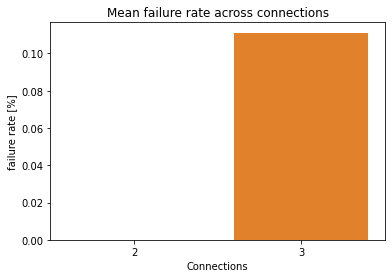

In [ ]:
sns.barplot(x=[2,3], y=[prop_2, prop_3])
plt.xlabel('Connections')
plt.title('Mean failure rate across connections')
plt.ylabel('failure rate [%]');

Connection 2 contains no failures, meaning that all pre synaptic stimulations lead to an EPSP. However, connection 3 contains one failure event leading to a failure rate of 11%

### Visualize amplitudes 
For each conneciton, we visualize the amplitudes of the single EPSP and we highlight the failures in red. The 'success' are in green.

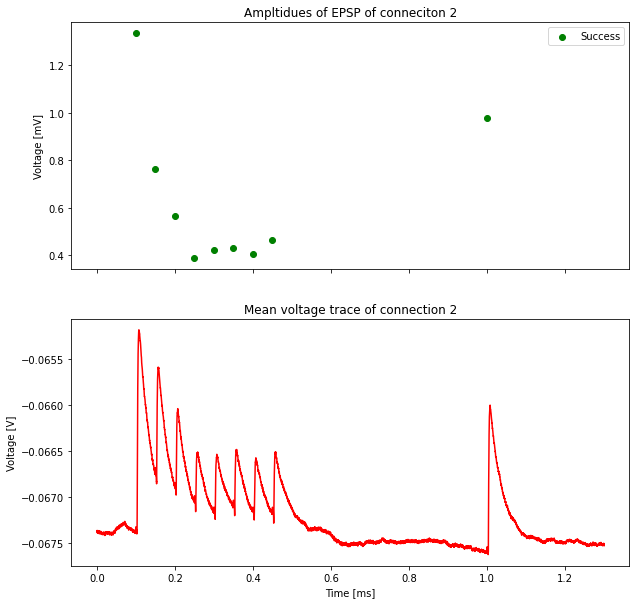

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(10, 10), sharex=True)
ax[0].scatter(time[stimulation_indices], amplitudes_2, c="green", label='Success')
if sum(failures_2==1)>0:
    ax[0].scatter(time[np.where(failures_2==1)[0][0]], amplitudes_2[np.where(failures_2==1)[0][0]], c="red")

ax[1].plot(time, mean_traces_2, "r")
ax[0].set_ylabel("Voltage [mV]")
ax[0].legend()
ax[0].set_title('Ampltidues of EPSP of conneciton 2')
ax[1].set_ylabel("Voltage [V]")
ax[1].set_title("Mean voltage trace of connection 2")
ax[1].set_xlabel("Time [ms]");

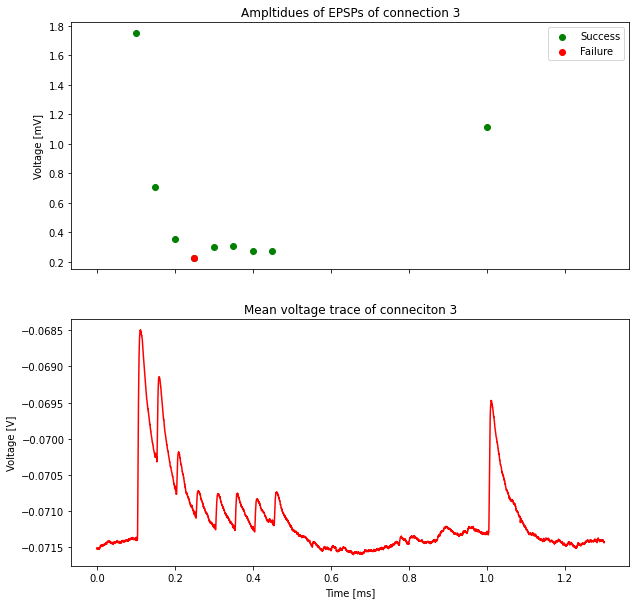

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(10, 10), sharex=True)
ax[0].scatter(time[stimulation_indices], amplitudes_3, c="green", label='Success')
if sum(failures_3==1)>0:
    ax[0].scatter(time[stimulation_indices[np.where(failures_3==1)[0][0]]], amplitudes_3[np.where(failures_3==1)[0][0]], c="red", label='Failure')

ax[1].plot(time, mean_traces_3, "r")
ax[0].set_ylabel("Voltage [mV]")
ax[0].legend()
ax[0].set_title('Ampltidues of EPSPs of connection 3')
ax[1].set_ylabel("Voltage [V]")
ax[1].set_title("Mean voltage trace of conneciton 3")
ax[1].set_xlabel("Time [ms]");